In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df = pd.read_csv('final_data.csv')

In [5]:
df.head()

,StateAbbr,StateDesc,CountyName,CountyFIPS,TotalPopulation,OBESITY_CrudePrev,Parks,Gyms,New FF,Density,PG Density
0,ID,Idaho,Lewis,16061,"3,715",33.4,4.0,2,1109,2985.195155,16.150740
1,IL,Illinois,Pope,17151,"3,779",37.3,4.0,4,1109,2934.638793,21.169622
2,AK,Alaska,Lake and Peninsula,2164,"1,416",40.3,5.0,1,415,2930.790960,42.372881
3,ND,North Dakota,Slope,38087,690,37.6,19.0,38,200,2898.550725,826.086957
4,WV,West Virginia,Pendleton,54071,"6,142",41.5,5.0,3,1620,2637.577336,13.025073


In [6]:
df['CountyFIPS'] = df['CountyFIPS'].apply(lambda x: '{0:0>5}'.format(x))

In [7]:
def create_bar_plot_in_desending_order(category, value):
  # Sample data (replace this with your own data)
  categories = category
  values = value

  # Sort the data in descending order
  sorted_data = sorted(zip(categories, values), key=lambda x: x[1], reverse=True)

  # Select the top N attributes to display
  top_n = 20  # Change this value to the number of attributes you want to display
  top_categories, top_values = zip(*sorted_data[:top_n])

  # Create the bar plot
  plt.figure(figsize=(12, 6))
  plt.bar(top_categories, top_values, color='skyblue')
  plt.xlabel('Attributes')
  plt.ylabel('Values')
  plt.title(f'Top {top_n} Attributes by Value')
  plt.xticks(rotation=45)  # Rotate x-axis labels if needed
  plt.tight_layout()
  plt.show()

def create_bar_plot_in_ascending_order(counties, values, state_abbreviations):

  # Sort the data in ascending order
  sorted_data = sorted(zip(counties, state_abbreviations, values), key=lambda x: x[2])
  counties, state_abbreviations, values = zip(*sorted_data)

  # Select the smallest 20 values to display
  smallest_n = 20
  counties = counties[:smallest_n]
  state_abbreviations = state_abbreviations[:smallest_n]
  values = values[:smallest_n]

  # Create labels with county and state abbreviation
  labels = [f'{county}, {state_abbr}' for county, state_abbr in zip(counties, state_abbreviations)]

  # Create the bar plot
  plt.figure(figsize=(12, 6))
  plt.bar(labels, values, color='skyblue')
  plt.xlabel('US Counties')
  plt.ylabel('Fast food stores per 10000 residents')
  plt.title(f'{smallest_n} Counties with lowest Fast food stores per capita in Ascending Order')
  plt.xticks(rotation=45, ha='right')  # Rotate and right-align x-axis labels for better readability
  plt.tight_layout()
  plt.show()


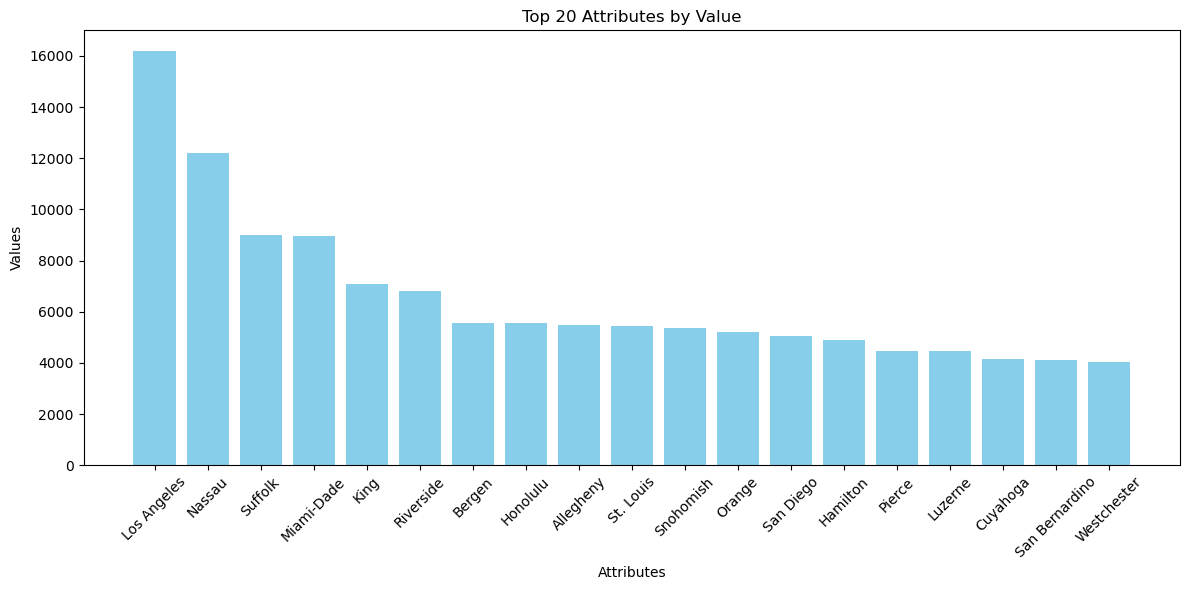

In [8]:
create_bar_plot_in_desending_order(df['CountyName'], df['New FF'])

In [9]:
df = df.replace(',', '', regex=True)

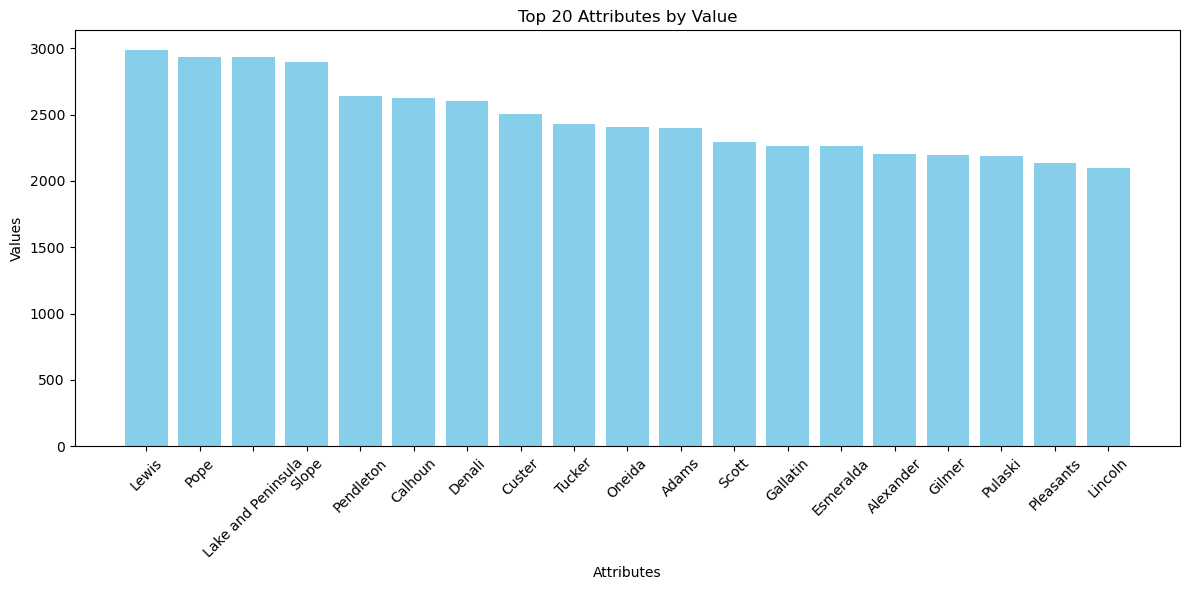

In [10]:
create_bar_plot_in_desending_order(df['CountyName'], df['Density'])

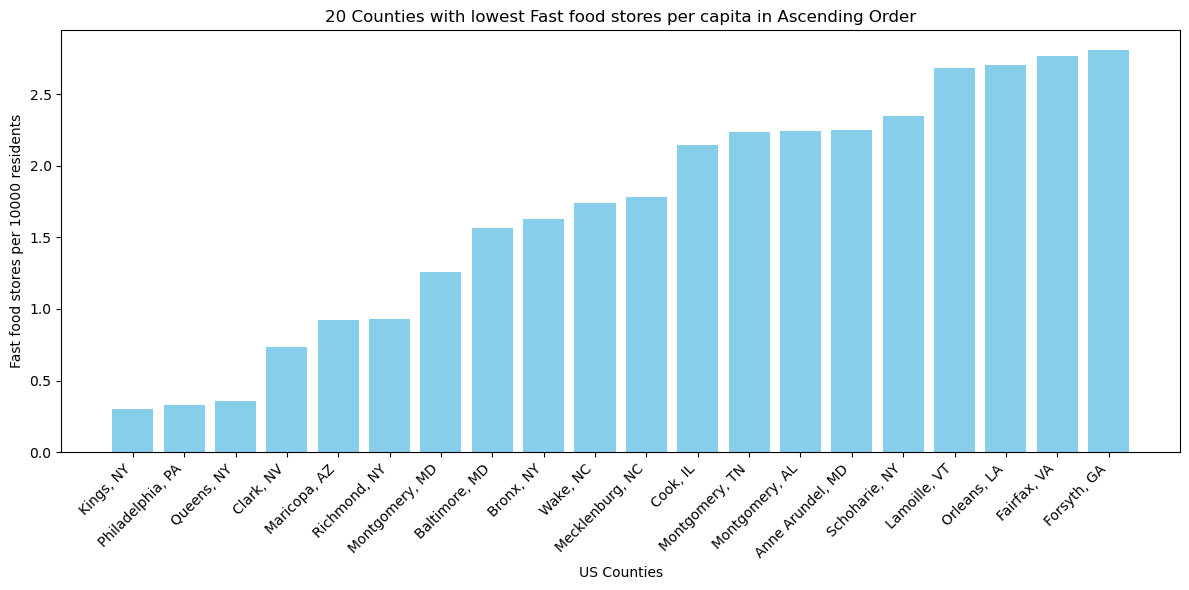

In [11]:
create_bar_plot_in_ascending_order(df['CountyName'], df['Density'], df['StateAbbr'])

In [12]:
import plotly.express as px

from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

def draw_map(df, attribute):
  fig = px.choropleth(df, geojson=counties, locations='CountyFIPS', color=attribute,
                            range_color=(df[attribute].min(),df[attribute].max()),
                            scope="usa",
                            labels={attribute:'Obesity Percentage'},
                            )
  fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
  fig = fig.update_traces(
    marker_line_width=0
  )
  fig.show()

In [ ]:
new_df = df[["TotalPopulation",	"OBESITY_CrudePrev"	,"Parks",	"Gyms",	"New FF",	"Density", "PG Density"]]
new_df.corr(method='spearman')

C:\Users\User\AppData\Local\Temp\ipykernel_21956\1894042509.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_df.corr(method='spearman')


,OBESITY_CrudePrev,Parks,Gyms,New FF,Density,PG Density
OBESITY_CrudePrev,1.000000,-0.191133,-0.209239,-0.202241,0.154799,0.033111
Parks,-0.191133,1.000000,0.829268,0.245613,-0.282821,0.455891
Gyms,-0.209239,0.829268,1.000000,0.234976,-0.334026,0.468788
New FF,-0.202241,0.245613,0.234976,1.000000,0.204942,-0.297777
Density,0.154799,-0.282821,-0.334026,0.204942,1.000000,0.266730
PG Density,0.033111,0.455891,0.468788,-0.297777,0.266730,1.000000


Text(0, 0.5, 'Obesity percentage(%)')

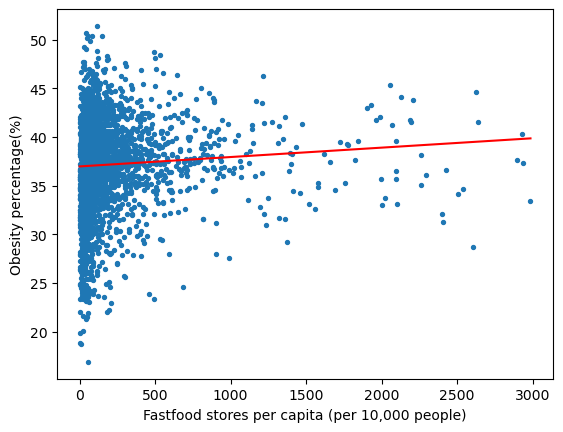

In [ ]:
plt.scatter(new_df['Density'],new_df['OBESITY_CrudePrev'],s=8)
plt.xlabel("Fastfood stores per capita (per 10,000 people)")
coefficients = np.polyfit(new_df['Density'], new_df['OBESITY_CrudePrev'], 1)
slope, intercept = coefficients
plt.plot(df['Density'], slope * new_df['Density'] + intercept, color='red', label='Linear Regression')
plt.ylabel("Obesity percentage(%)")

Text(0, 0.5, 'Obesity percentage(%)')

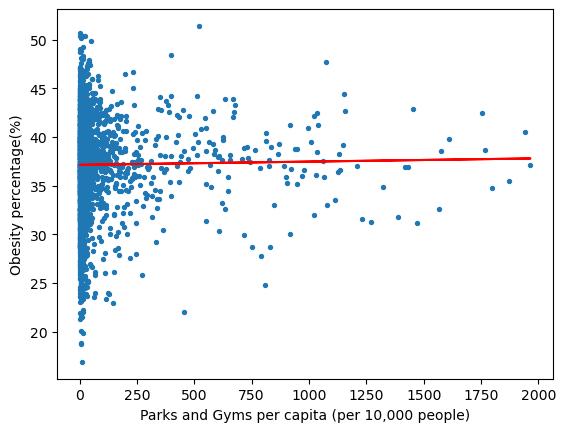

In [ ]:
new_df = new_df[new_df['PG Density']<2000]
new_df.shape
plt.scatter(new_df['PG Density'],new_df['OBESITY_CrudePrev'],s=8)
plt.xlabel("Parks and Gyms per capita (per 10,000 people)")
coefficients = np.polyfit(new_df['PG Density'], new_df['OBESITY_CrudePrev'], 1)
slope, intercept = coefficients
plt.plot(new_df['PG Density'], slope * new_df['PG Density'] + intercept, color='red', label='Linear Regression')
plt.ylabel("Obesity percentage(%)")

In [ ]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(df['Density'], df['OBESITY_CrudePrev'])
print(slope, intercept, p_value)

0.0009644408852726627 36.973398243180924 0.00016640100103021554


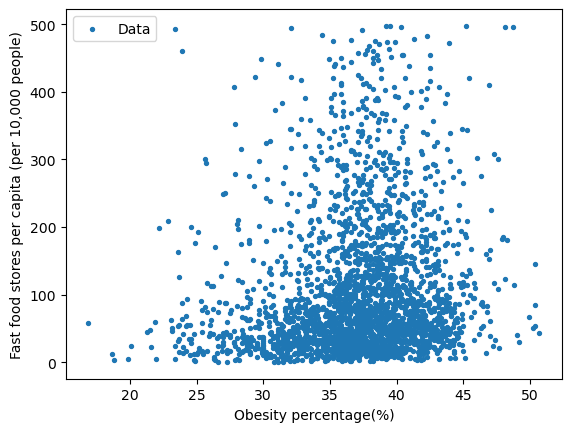

In [ ]:
import matplotlib.pyplot as plt

new_df = new_df[new_df['Density']<2000]

# Your data
y = new_df['Density']  # Swap x and y
x = new_df['OBESITY_CrudePrev']  # Swap x and y

# Create a scatter plot of the data
plt.scatter(x, y, s=8, label='Data')
plt.xlabel("Obesity percentage(%)")  # Swap x and y labels
plt.ylabel("Fast food stores per capita (per 10,000 people)")  # Swap x and y labels

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()


In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


# Generate some data for this demonstration.
data = norm.rvs(10.0, 2.5, size=500)

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

In [ ]:
import scipy.stats as stats

A = new_df['Density']
B = new_df['OBESITY_CrudePrev']
# Assuming you have two datasets A and B
# A and B should be NumPy arrays or Python lists

# Perform the independent samples t-test
t_statistic, p_value = stats.ttest_ind(A, B)

# Print the results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Define your significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha to make a decision
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the groups.")


NameError: name 'new_df' is not defined